# Removing outliers - outlier trimming

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

In this notebook, we will remove observations that are beyond certain limits.

We we calculate those limits using:

- The IQR proximity rule
- The normal distribution
- The quantiles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from feature_engine.outliers import OutlierTrimmer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [3]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [4]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

## IQR

In [5]:
trimmer = OutlierTrimmer(
    variables=["MedInc", "HouseAge", "Population"],
    capping_method="iqr",
    tail="both",
    fold=1.5,
)

trimmer.fit(X_train)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['MedInc', 'HouseAge', 'Population'])

In [6]:
trimmer.left_tail_caps_

{'MedInc': -0.6776500000000012, 'HouseAge': -10.5, 'Population': -626.0}

In [7]:
trimmer.right_tail_caps_

{'MedInc': 7.984350000000001, 'HouseAge': 65.5, 'Population': 3134.0}

In [8]:
print(X_train.shape, X_test.shape)

X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)

print(X_train_enc.shape, X_test_enc.shape)

(14448, 8) (6192, 8)
(13165, 8) (5619, 8)


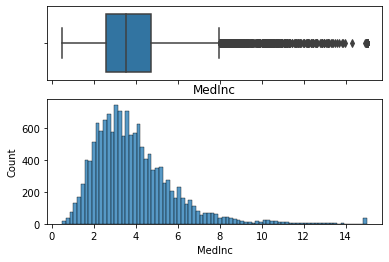

In [9]:
# before trimming

plot_boxplot_and_hist(X_train, "MedInc")

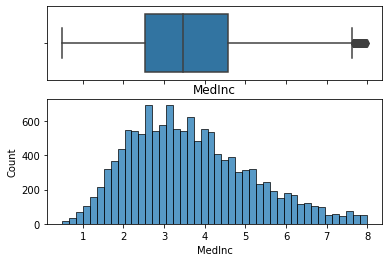

In [10]:
# after trimming

plot_boxplot_and_hist(X_train_enc, "MedInc")

## Normal distribution

In [11]:
trimmer = OutlierTrimmer(
    variables=["MedInc", "HouseAge", "Population"],
    capping_method="gaussian",
    tail="both",
    fold=3,
)

trimmer.fit(X_train)

OutlierTrimmer(tail='both', variables=['MedInc', 'HouseAge', 'Population'])

In [12]:
trimmer.left_tail_caps_

{'MedInc': -1.8066096615744187,
 'HouseAge': -9.17007383277543,
 'Population': -2023.4637951237148}

In [13]:
trimmer.right_tail_caps_

{'MedInc': 9.539944476081617,
 'HouseAge': 66.40747693355063,
 'Population': 4873.778440749407}

In [14]:
print(X_train.shape, X_test.shape)

X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)

print(X_train_enc.shape, X_test_enc.shape)

(14448, 8) (6192, 8)
(13971, 8) (5995, 8)


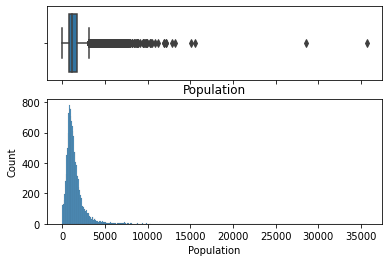

In [15]:
# before trimming

plot_boxplot_and_hist(X_train, "Population")

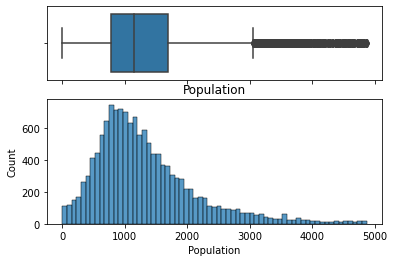

In [16]:
# after trimming 

plot_boxplot_and_hist(X_train_enc, "Population")

## quantiles

In [17]:
trimmer = OutlierTrimmer(
    variables=["MedInc", "HouseAge", "Population"],
    capping_method="quantiles",
    tail="both",
    fold=0.05,
)

trimmer.fit(X_train)

OutlierTrimmer(capping_method='quantiles', fold=0.05, tail='both',
               variables=['MedInc', 'HouseAge', 'Population'])

In [18]:
trimmer.left_tail_caps_

{'MedInc': 1.60152, 'HouseAge': 8.0, 'Population': 346.0}

In [19]:
trimmer.right_tail_caps_

{'MedInc': 7.284699999999999,
 'HouseAge': 52.0,
 'Population': 3288.6499999999996}

In [20]:
print(X_train.shape, X_test.shape)

X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)

print(X_train_enc.shape, X_test_enc.shape)

(14448, 8) (6192, 8)
(11352, 8) (4881, 8)


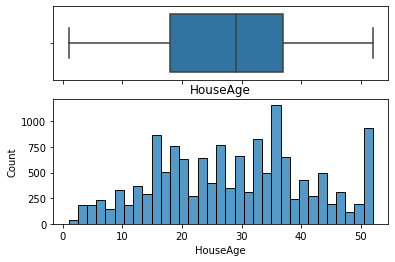

In [21]:
# before trimming

plot_boxplot_and_hist(X_train, "HouseAge")

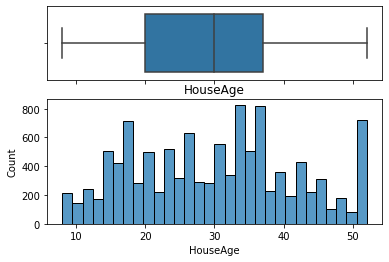

In [22]:
# after trimming

plot_boxplot_and_hist(X_train_enc, "HouseAge")

Values at the left were removed.